<a href="https://colab.research.google.com/github/May-Moon-Colab/May-Moon-Colab/blob/main/Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CASE STUDY: Catholic Schools & Standardized Tests (Briefing)
  DESCRIPTION:

  Use Matching to understand whether catholic schoolsare better than others (from a standardized test score view).
     
  * 1. We have a dataset with kids' backgrounds, their parents upbringing among others.
  * 2. The key metric of success is the standardized test scores.
  * 3. We need to re-create a comparable control group.


#Libraries Directory, and Data

In [ ]:
#direcrtory
%cd /content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching

/content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching


In [ ]:
#install library
!pip install CausalInference

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 2.3 MB/s eta 0:00:00


In [10]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
from causalinference import CausalModel


In [ ]:
#Data
df = pd.read_csv("school.csv")
df = df.iloc[:,1:]
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


#Data Analysis

In [7]:
#compare the averages of both groups
df.groupby('catholic').mean()

,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized
catholic,,,,,,,,,
0,1.106246,37.794621,40.134919,43.909495,42.590520,65393.928540,0.101578,0.045566,0.163128
1,1.073118,39.775269,42.007527,47.620871,45.908269,86180.625269,0.016129,0.006452,0.219685


In [13]:
#t-test
group1 = df.where(df.catholic == 0).dropna()['income']
group2 = df.where(df.catholic == 1).dropna()['income']
stat, p = ss.ttest_ind(group1, group2)
print(p)

5.943636213205364e-41


In [16]:
#get the continuous variables
continuous = ["number_places_lived", "mom_age", "income", "dad_age", "mom_score", "dad_score", "income"]
#storig results
stat = {}
p = {}
#loop
for x in continuous:
  group1 = df.where(df.catholic == 0).dropna()[x]
  group2 = df.where(df.catholic == 1).dropna()[x]
  stat[x], p[x] = ss.ttest_ind(group1, group2)
ttests = pd.DataFrame.from_dict(p, orient = "Index")
ttests.columns = ["pvalue"]
print(ttests)

                           pvalue
number_places_lived  7.072609e-03
mom_age              1.359492e-22
income               5.943636e-41
dad_age              3.344265e-16
mom_score            2.280116e-19
dad_score            5.489722e-18


In [20]:
#chi-square
tab = pd.crosstab(index = df.poverty,
            columns = df.catholic)
stat, p ,dof,exp = ss.chi2_contingency(tab)
print(p)

6.511354893726035e-17


In [22]:
#What to loop
categorical = ["poverty", "food_stamps"]

#where to store
p = {}

#loop
for y in categorical:
  tab = pd.crosstab(index = df[y],
            columns = df.catholic)
  stat, p[y] ,dof , exp = ss.chi2_contingency(tab)
chisquare= pd.DataFrame.from_dict(p, orient = "Index")
chisquare.columns = ["pvalue"]
print(chisquare)

                   pvalue
poverty      6.511355e-17
food_stamps  3.294153e-08


#Data preparation

In [23]:
#Race variable
df.race.value_counts()

WHITE, NON-HISPANIC                        3654
HISPANIC, RACE NOT SPECIFIED                408
HISPANIC, RACE SPECIFIED                    387
BLACK OR AFRICAN AMERICAN, NON-HISPANIC     357
ASIAN                                       342
MORE THAN ONE RACE, NON HISPANIC            123
NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER      93
AMERICAN INDIAN OR ALASKA NATIVE             62
NOT ASCERTAINED                               3
Name: race, dtype: int64

In [31]:
#transforming race variable, no olvidar simbolo del palo ( '|' alt + 124)
df['race_white'] = np.where(df.race == 'WHITE, NON-HISPANIC', 1, 0)
df['race_hispanic'] = np.where((df.race == 'HISPANIC, RACE NOT SPECIFIED') |
                               (df.race == 'HISPANIC, RACE SPECIFIED'), 1, 0)
df['race_black'] = np.where(df.race == 'BLACK OR AFRICAN AMERICAN, NON-HISPANIC', 1, 0 )
df['race_asian'] = np.where(df.race == 'ASIAN', 1, 0 )


In [33]:
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753,1,0,0,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378,1,0,0,0
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611,1,0,0,0
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278,1,0,0,0
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699,1,0,0,0


In [35]:
#education variable overview
df.mom_education.value_counts()

SOME COLLEGE                              1721
HIGH SCHOOL DIPLOMA/EQUIVALENT            1306
BACHELOR'S DEGREE                         1085
MASTER'S DEGREE (MA, MS)                   387
VOC/TECH PROGRAM                           294
9TH - 12TH GRADE                           222
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE     170
8TH GRADE OR BELOW                         134
DOCTORATE OR PROFESSIONAL DEGREE           110
Name: mom_education, dtype: int64

In [37]:
#Transforming education variable
df [ "dad_higher_education"] = np.where((df.dad_education == "BACHELOR'S DEGREE") |
                                        (df.dad_education == "MASTER'S DEGREE (MA, MS)") |
                                        (df.dad_education == "DOCTORATE OR PROFESSIONAL DEGREE"), 
                                        1, 0)

In [38]:
df.head(1)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.5,77.5,62500.5,0,0,0.981753,1,0,0,0,1


In [39]:
#Clean the df
df = df.drop(columns = ["race", "dad_education", "mom_education"])
df.head(1)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education
0,0,1,47,45,53.5,77.5,62500.5,0,0,0.981753,1,0,0,0,1


In [40]:
#Isolate confounders, treat, y
treat = df.catholic.values
y  = df.score_standardized.values
confounders = df.drop(columns = ["catholic", "score_standardized"]).values

#cCommon Support Region

In [42]:
#Logistic Regression
import statsmodels.api as sm
confounders_csr = sm.add_constant(confounders)
csr_model = sm.Logit(treat, confounders_csr).fit()
print(csr_model.summary())

Optimization terminated successfully.
         Current function value: 0.431354
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5429
Model:                          Logit   Df Residuals:                     5415
Method:                           MLE   Df Model:                           13
Date:                Fri, 10 Mar 2023   Pseudo R-squ.:                 0.05807
Time:                        00:09:27   Log-Likelihood:                -2341.8
converged:                       True   LL-Null:                       -2486.2
Covariance Type:            nonrobust   LLR p-value:                 5.489e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4871      0.412    -10.899      0.000      -5.294      -3.680
x1            -0.1728      0.

In [43]:
#predictions
probabilities = csr_model.predict(confounders_csr)
probabilities

array([0.28692769, 0.18216744, 0.27167438, ..., 0.21480337, 0.12246218,
       0.18728754])

In [45]:
#build object with treat and probabilities
df_prob = np.vstack([treat, probabilities])
df_prob = np.transpose(df_prob)
df_prob

array([[0.        , 0.28692769],
       [0.        , 0.18216744],
       [0.        , 0.27167438],
       ...,
       [0.        , 0.21480337],
       [0.        , 0.12246218],
       [0.        , 0.18728754]])

In [46]:
#split between treated and non-treated
non_treated = df_prob[:,0] == 0 
non_treated = df_prob[non_treated, 1]
treated = df_prob[:,0] == 1 
treated = df_prob[treated, 1]

<AxesSubplot:ylabel='Density'>

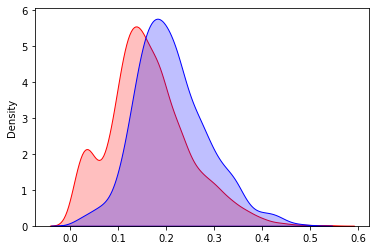

In [47]:
#plot common support region
sns.kdeplot(non_treated, shade = True, color = 'red')
sns.kdeplot(treated, shade = True, color = 'blue')

#Matching Model

In [48]:
#Matching model
model = CausalModel(y, treat, confounders)
model.est_via_matching (bias_adj = True)
print(model.estimates)

/usr/local/lib/python3.9/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.110      0.066     -1.673      0.094     -0.239      0.019
           ATC     -0.098      0.073     -1.334      0.182     -0.241      0.046
           ATT     -0.170      0.061     -2.807      0.005     -0.289     -0.051



#Robustness check-repeated samples

In [50]:
#isolate the coefficient
model.estimates [ 'matching']['ate']

-0.1099856209605504

In [ ]:
#While loop
ate = {}
i = 0

#Loop
while i < 1000:
  #Sampling
  sample = df.sample(1000)

  #isolation of treat, y and confounders
  treat = sample.catholic.values
  y  = sample.score_standardized.values
  confounders = sample.drop(columns = ["catholic", "score_standardized"]).values
  
  #matching model
  model = CausalModel(y, treat, confounders)
  model.est_via_matching (bias_adj = True)

  #store the results
  ate[i] = model.estimates['matching']['ate']

  print(i)
  i+= 1

AxesSubplot(0.125,0.125;0.775x0.755)
-0.1050944931405555


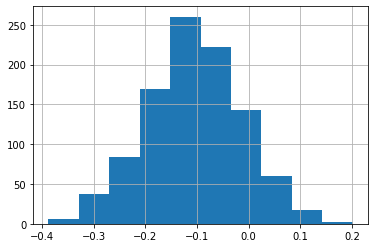

In [52]:
#Visualize results
ate = pd.Series(ate)
print(ate.hist())
print(ate.mean())

#Robustness check - removing 1 confounder

In [53]:
df.columns

Index(['catholic', 'number_places_lived', 'mom_age', 'dad_age', 'mom_score',
       'dad_score', 'income', 'poverty', 'food_stamps', 'score_standardized',
       'race_white', 'race_hispanic', 'race_black', 'race_asian',
       'dad_higher_education'],
      dtype='object')

In [54]:
#new confounder list of isolation of treat, y and confounders
treat = df.catholic.values
y  = df.score_standardized.values
confounders = df.drop(columns = ["catholic", "score_standardized",
                                       "number_places_lived"]).values

In [55]:
#matching model
model = CausalModel(y, treat, confounders)
model.est_via_matching (bias_adj = True)
print(model.estimates)

/usr/local/lib/python3.9/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.107      0.066     -1.616      0.106     -0.238      0.023
           ATC     -0.101      0.074     -1.360      0.174     -0.246      0.044
           ATT     -0.140      0.061     -2.308      0.021     -0.259     -0.021

